In [1]:
import pandas as pd
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060809,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062980,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064067,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062437,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061351,47894400
...,...,...,...,...,...,...,...
9244,2022-11-14,241.990005,243.910004,239.210007,241.550003,240.871185,31123300
9245,2022-11-15,245.660004,247.000000,240.029999,241.970001,241.290009,31390100
9246,2022-11-16,242.789993,243.800003,240.419998,241.729996,241.729996,24093300
9247,2022-11-17,237.779999,243.250000,237.630005,241.679993,241.679993,23123500


In [2]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9244,2022-11-14,241.550003
9245,2022-11-15,241.970001
9246,2022-11-16,241.729996
9247,2022-11-17,241.679993


In [3]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9244    2022-11-14
9245    2022-11-15
9246    2022-11-16
9247    2022-11-17
9248    2022-11-18
Name: Date, Length: 9249, dtype: object

In [4]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [5]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\Wu Honghao\AppData\Local\Temp\ipykernel_34256\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9244   2022-11-14
9245   2022-11-15
9246   2022-11-16
9247   2022-11-17
9248   2022-11-18
Name: Date, Length: 9249, dtype: datetime64[ns]

In [6]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2022-11-14,241.550003
2022-11-15,241.970001
2022-11-16,241.729996


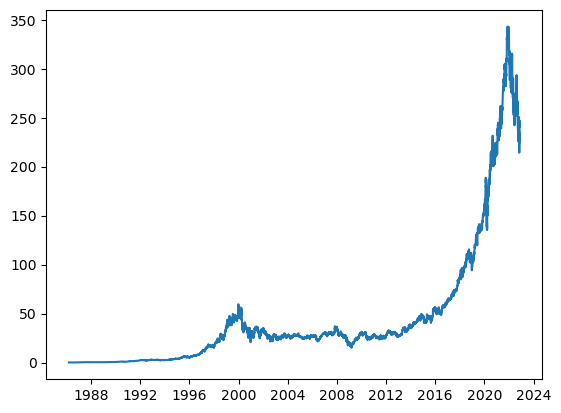

In [7]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [14]:
import numpy as np
import random 
random.seed(1)

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '1986-03-30', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,1986-03-30,0.090278,0.092014,0.094618,0.096354
1,1986-04-01,0.094618,0.096354,0.095486,0.094618
2,1986-04-02,0.096354,0.095486,0.094618,0.095486
3,1986-04-03,0.095486,0.094618,0.095486,0.096354
4,1986-04-04,0.094618,0.095486,0.096354,0.096354
...,...,...,...,...,...
9066,2022-03-17,276.440002,287.149994,294.390015,295.220001
9067,2022-03-18,287.149994,294.390015,295.220001,300.429993
9068,2022-03-21,294.390015,295.220001,300.429993,299.160004
9069,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [15]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((9071,), (9071, 3, 1), (9071,))

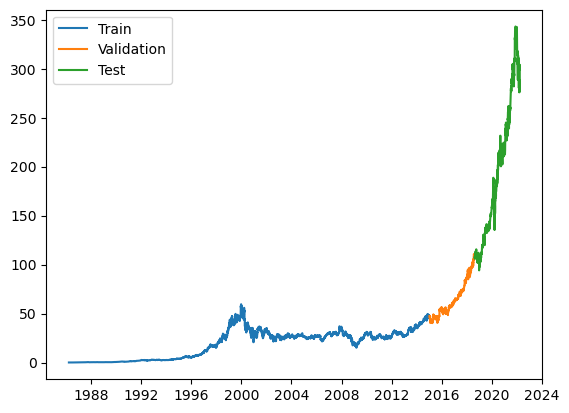

In [16]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
227/227 [==============================] - 3s 4ms/step - loss: 91.4752 - mean_absolute_error: 4.2712 - val_loss: 516.7937 - val_mean_absolute_error: 15.3589
Epoch 2/100
227/227 [==============================] - 1s 2ms/step - loss: 0.3749 - mean_absolute_error: 0.3335 - val_loss: 402.7679 - val_mean_absolute_error: 12.7021
Epoch 3/100
227/227 [==============================] - 1s 3ms/step - loss: 0.3138 - mean_absolute_error: 0.3154 - val_loss: 359.2929 - val_mean_absolute_error: 11.6726
Epoch 4/100
227/227 [==============================] - 1s 2ms/step - loss: 0.3371 - mean_absolute_error: 0.3407 - val_loss: 345.7590 - val_mean_absolute_error: 11.6439
Epoch 5/100
227/227 [==============================] - 1s 3ms/step - loss: 0.2958 - mean_absolute_error: 0.3134 - val_loss: 322.7808 - val_mean_absolute_error: 10.8929
Epoch 6/100
227/227 [==============================] - 1s 2ms/step - loss: 0.3141 - mean_absolute_error: 0.3256 - val_loss: 310.0838 - val_mean_absolute_error:

29/29 [==============================] - 0s 714us/step
mse_val: 192.25441
29/29 [==============================] - 0s 750us/step
mse_test: 25135.447


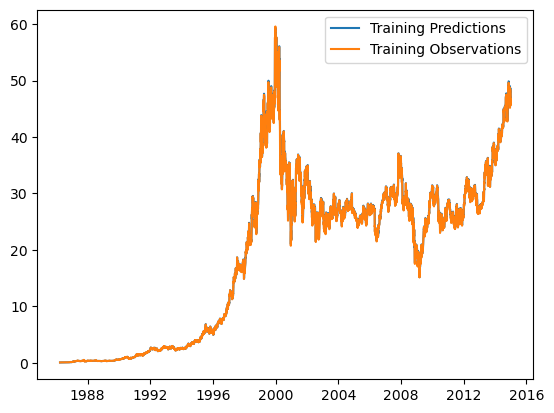

In [18]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])
y_pred_val = model.predict(X_val)
mse_val=mean_squared_error(y_val, y_pred_val)
print('mse_val:',mse_val)
y_pred_test = model.predict(X_test)
mse_test=mean_squared_error(y_test, y_pred_test)
print('mse_test:',mse_test)

29/29 [==============================] - 0s 893us/step


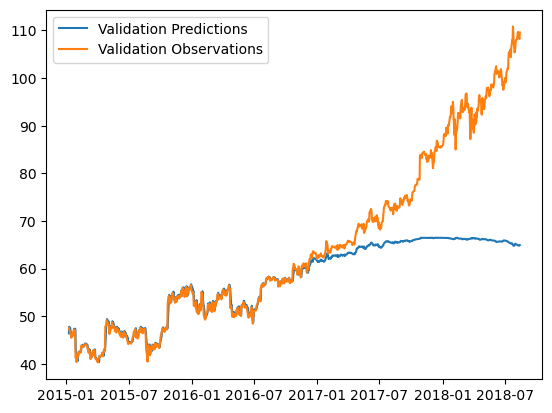

In [19]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

29/29 [==============================] - 0s 1ms/step


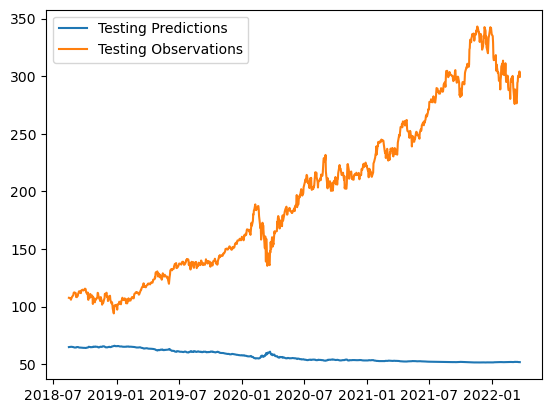

In [20]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

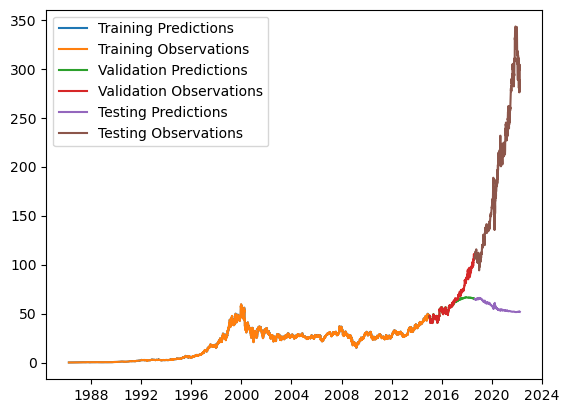

In [21]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Dropout, Conv1D
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from keras.callbacks import ModelCheckpoint
NN_model = Sequential()
Dropout_ratio=0.1

# The Input Layer :
NN_model.add(Dense(16, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(Dropout_ratio))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(Dropout_ratio))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(Dropout_ratio))




# tf.keras.optimizers.Adam(learning_rate=0.00007)
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
# NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
# NN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

NN_model.fit(X_train,y_train,epochs=10)
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]


y_pred_valid = NN_model.predict(X_val)

mse_valid=mean_squared_error(y_val, y_pred_valid)
print('mse_valid:',mse_valid)

y_pred_test = NN_model.predict(X_test)
mse_test=mean_squared_error(y_test, y_pred_test)
print('mse_test:',mse_test)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                64        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)               

227/227 [==============================] - 0s 593us/step


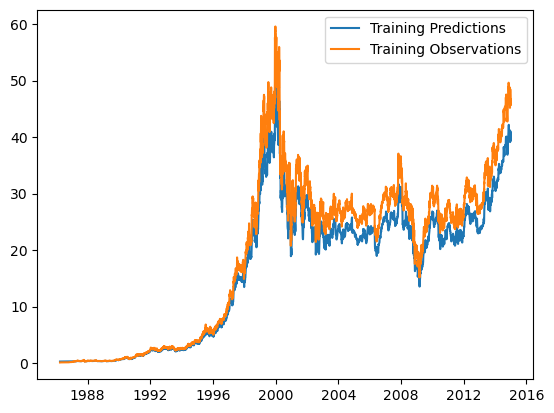

In [23]:
train_predictions = NN_model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

29/29 [==============================] - 0s 719us/step


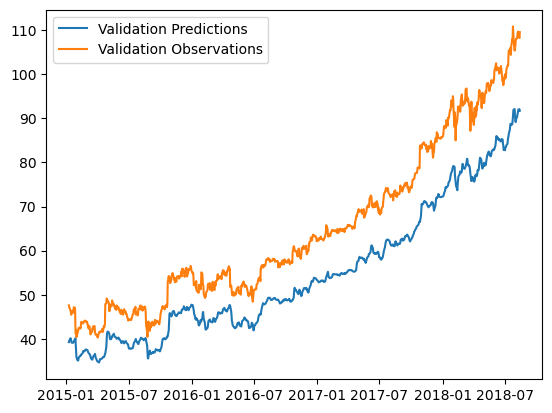

In [24]:
val_predictions = NN_model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

29/29 [==============================] - 0s 786us/step


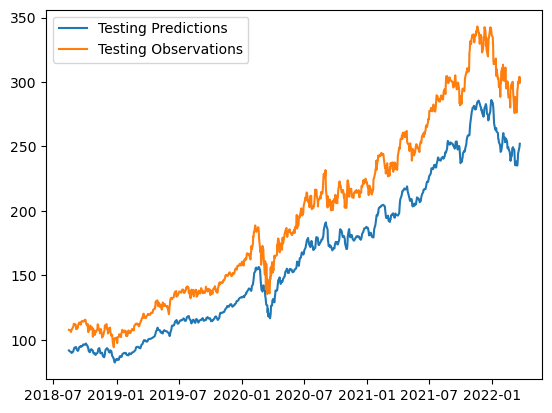

In [25]:
test_predictions = NN_model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

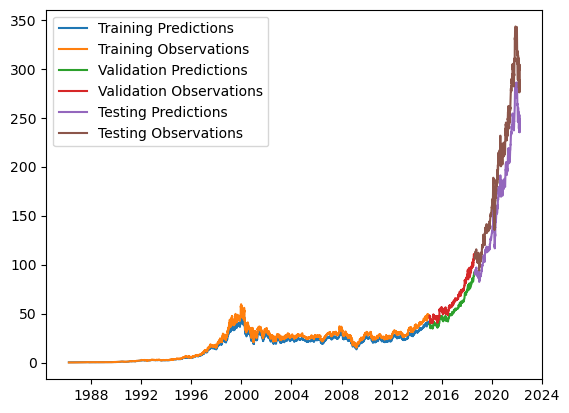

In [26]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [27]:
CNN_model = Sequential()
CNN_model.add(Conv1D(32, 2, activation="relu", input_shape=(3, 1)))
CNN_model.add(Flatten())
CNN_model.add(Dense(64, activation="relu"))
CNN_model.add(Dense(1))
CNN_model.compile(loss="mse", optimizer="adam")
 
CNN_model.summary()
CNN_model.fit(X_train,y_train,epochs=30)



y_pred_valid = CNN_model.predict(X_val)

mse_valid=mean_squared_error(y_val, y_pred_valid)
print('mse_valid:',mse_valid)

y_pred_test = CNN_model.predict(X_test)
mse_test=mean_squared_error(y_test, y_pred_test)
print('mse_test:',mse_test)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 32)             96        
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,321
Trainable params: 4,321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
227/227 [==============================] - 0s 832us/step - loss: 24.1534
Epoch 2/30
227/227 [==============================] - 0s 841us/step - loss: 0.4106
Epoch 3/30
227/22

227/227 [==============================] - 0s 580us/step


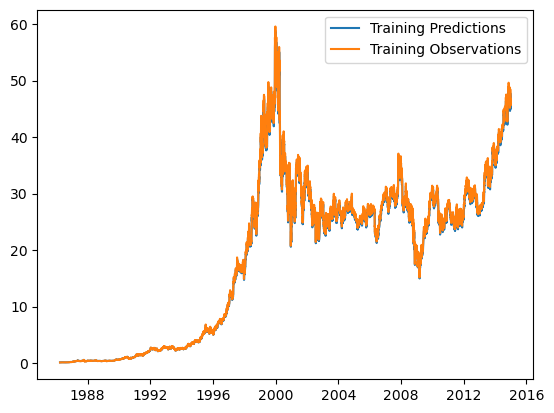

In [28]:
train_predictions = CNN_model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

29/29 [==============================] - 0s 714us/step


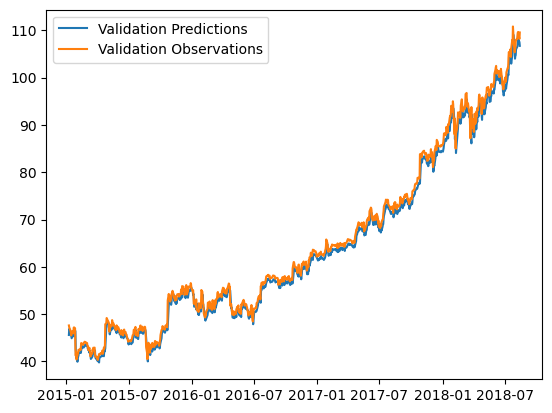

In [29]:
val_predictions = CNN_model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

29/29 [==============================] - 0s 500us/step


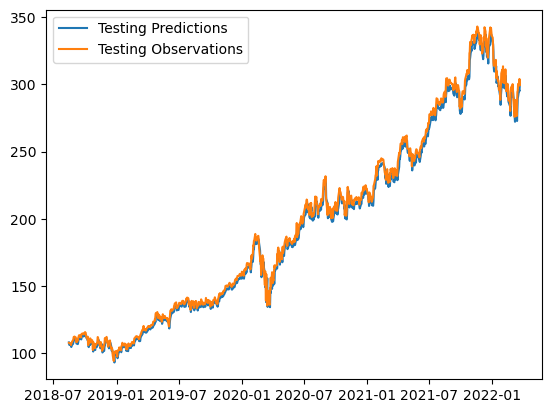

In [30]:
test_predictions = CNN_model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

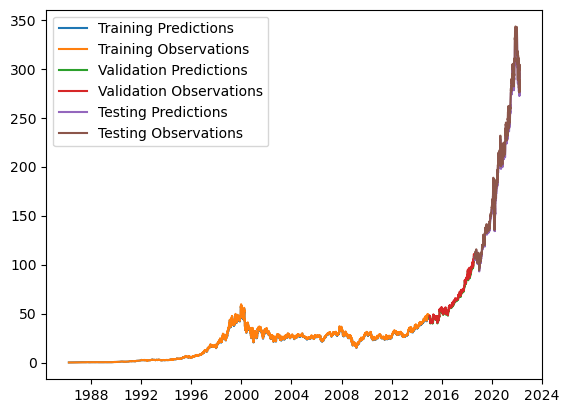

In [31]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [37]:
import random, os, sys
import numpy as np
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.python.keras.layers import Layer

try:
    from dataloader import TokenList, pad_to_longest
    # for transformer
except: pass


EPOCHS = 10  # how many passes through our data
BATCH_SIZE = 16  # how many batches? Try smaller batch if you're getting OOM (out of memory) errors.
embed_size = 60
SEQ_LEN=3
class LayerNormalization(Layer):
    def __init__(self, eps=1e-6, **kwargs):
        self.eps = eps
        super(LayerNormalization, self).__init__(**kwargs)
    def build(self, input_shape):
        self.gamma = self.add_weight(name='gamma', shape=input_shape[-1:],
                                     initializer=Ones(), trainable=True)
        self.beta = self.add_weight(name='beta', shape=input_shape[-1:],
                                    initializer=Zeros(), trainable=True)
        super(LayerNormalization, self).build(input_shape)
    def call(self, x):
        mean = K.mean(x, axis=-1, keepdims=True)
        std = K.std(x, axis=-1, keepdims=True)
        return self.gamma * (x - mean) / (std + self.eps) + self.beta
    def compute_output_shape(self, input_shape):
        return input_shape

class ScaledDotProductAttention():
    def __init__(self, d_model, attn_dropout=0.1):
        self.temper = np.sqrt(d_model)
        self.dropout = Dropout(attn_dropout)
    def __call__(self, q, k, v, mask):
        attn = Lambda(lambda x:K.batch_dot(x[0],x[1],axes=[2,2])/self.temper)([q, k])
        if mask is not None:
            mmask = Lambda(lambda x:(-1e+10)*(1-x))(mask)
            attn = Add()([attn, mmask])
        attn = Activation('softmax')(attn)
        attn = self.dropout(attn)
        output = Lambda(lambda x:K.batch_dot(x[0], x[1]))([attn, v])
        return output, attn

class MultiHeadAttention():
    # mode 0 - big martixes, faster; mode 1 - more clear implementation
    def __init__(self, n_head, d_model, d_k, d_v, dropout, mode=0, use_norm=True):
        self.mode = mode
        self.n_head = n_head
        self.d_k = d_k
        self.d_v = d_v
        self.dropout = dropout
        if mode == 0:
            self.qs_layer = Dense(n_head*d_k, use_bias=False)
            self.ks_layer = Dense(n_head*d_k, use_bias=False)
            self.vs_layer = Dense(n_head*d_v, use_bias=False)
        elif mode == 1:
            self.qs_layers = []
            self.ks_layers = []
            self.vs_layers = []
            for _ in range(n_head):
                self.qs_layers.append(TimeDistributed(Dense(d_k, use_bias=False)))
                self.ks_layers.append(TimeDistributed(Dense(d_k, use_bias=False)))
                self.vs_layers.append(TimeDistributed(Dense(d_v, use_bias=False)))
        self.attention = ScaledDotProductAttention(d_model)
        self.layer_norm = LayerNormalization() if use_norm else None
        self.w_o = TimeDistributed(Dense(d_model))

    def __call__(self, q, k, v, mask=None):
        d_k, d_v = self.d_k, self.d_v
        n_head = self.n_head

        if self.mode == 0:
            qs = self.qs_layer(q)  # [batch_size, len_q, n_head*d_k]
            ks = self.ks_layer(k)
            vs = self.vs_layer(v)

            def reshape1(x):
                s = tf.shape(x)   # [batch_size, len_q, n_head * d_k]
                x = tf.reshape(x, [s[0], s[1], n_head, d_k])
                x = tf.transpose(x, [2, 0, 1, 3])  
                x = tf.reshape(x, [-1, s[1], d_k])  # [n_head * batch_size, len_q, d_k]
                return x
            qs = Lambda(reshape1)(qs)
            ks = Lambda(reshape1)(ks)
            vs = Lambda(reshape1)(vs)

            if mask is not None:
                mask = Lambda(lambda x:K.repeat_elements(x, n_head, 0))(mask)
            head, attn = self.attention(qs, ks, vs, mask=mask)  
                
            def reshape2(x):
                s = tf.shape(x)   # [n_head * batch_size, len_v, d_v]
                x = tf.reshape(x, [n_head, -1, s[1], s[2]]) 
                x = tf.transpose(x, [1, 2, 0, 3])
                x = tf.reshape(x, [-1, s[1], n_head*d_v])  # [batch_size, len_v, n_head * d_v]
                return x
            head = Lambda(reshape2)(head)
        elif self.mode == 1:
            heads = []; attns = []
            for i in range(n_head):
                qs = self.qs_layers[i](q)   
                ks = self.ks_layers[i](k) 
                vs = self.vs_layers[i](v) 
                head, attn = self.attention(qs, ks, vs, mask)
                heads.append(head); attns.append(attn)
            head = Concatenate()(heads) if n_head > 1 else heads[0]
            attn = Concatenate()(attns) if n_head > 1 else attns[0]

        outputs = self.w_o(head)
        outputs = Dropout(self.dropout)(outputs)
        if not self.layer_norm: return outputs, attn
        # outputs = Add()([outputs, q]) # sl: fix
        return self.layer_norm(outputs), attn

class PositionwiseFeedForward():
    def __init__(self, d_hid, d_inner_hid, dropout=0.1):
        self.w_1 = Conv1D(d_inner_hid, 1, activation='relu')
        self.w_2 = Conv1D(d_hid, 1)
        self.layer_norm = LayerNormalization()
        self.dropout = Dropout(dropout)
    def __call__(self, x):
        output = self.w_1(x) 
        output = self.w_2(output)
        output = self.dropout(output)
        output = Add()([output, x])
        return self.layer_norm(output)

class EncoderLayer():
    def __init__(self, d_model, d_inner_hid, n_head, d_k, d_v, dropout=0.1):
        self.self_att_layer = MultiHeadAttention(n_head, d_model, d_k, d_v, dropout=dropout)
        self.pos_ffn_layer  = PositionwiseFeedForward(d_model, d_inner_hid, dropout=dropout)
    def __call__(self, enc_input, mask=None):
        output, slf_attn = self.self_att_layer(enc_input, enc_input, enc_input, mask=mask)
        output = self.pos_ffn_layer(output)
        return output, slf_attn


def GetPosEncodingMatrix(max_len, d_emb):
    pos_enc = np.array([
        [pos / np.power(10000, 2 * (j // 2) / d_emb) for j in range(d_emb)] 
        if pos != 0 else np.zeros(d_emb) 
            for pos in range(max_len)
            ])
    pos_enc[1:, 0::2] = np.sin(pos_enc[1:, 0::2]) # dim 2i
    pos_enc[1:, 1::2] = np.cos(pos_enc[1:, 1::2]) # dim 2i+1
    return pos_enc

def GetPadMask(q, k):
    ones = K.expand_dims(K.ones_like(q, 'float32'), -1)
    mask = K.cast(K.expand_dims(K.not_equal(k, 0), 1), 'float32')
    mask = K.batch_dot(ones, mask, axes=[2,1])
    return mask

def GetSubMask(s):
    len_s = tf.shape(s)[1]
    bs = tf.shape(s)[:1]
    mask = K.cumsum(tf.eye(len_s, batch_shape=bs), 1)
    return mask

class Transformer():
    def __init__(self, len_limit, embedding_matrix, d_model=embed_size, \
              d_inner_hid=512, n_head=10, d_k=64, d_v=64, layers=2, dropout=0.1, \
              share_word_emb=False, **kwargs):
        self.name = 'Transformer'
        self.len_limit = len_limit
        self.src_loc_info = False # True # sl: fix later
        self.d_model = d_model
        self.decode_model = None
        d_emb = d_model

        pos_emb = Embedding(len_limit, d_emb, trainable=False, \
                            weights=[GetPosEncodingMatrix(len_limit, d_emb)])

        i_word_emb = Embedding(max_features, d_emb, weights=[embedding_matrix]) # Add Kaggle provided embedding here

        self.encoder = Encoder(d_model, d_inner_hid, n_head, d_k, d_v, layers, dropout, \
                               word_emb=i_word_emb, pos_emb=pos_emb)

        
    def get_pos_seq(self, x):
        mask = K.cast(K.not_equal(x, 0), 'int32')
        pos = K.cumsum(K.ones_like(x, 'int32'), 1)
        return pos * mask

    def compile(self, active_layers=999):
        src_seq_input = Input(shape=(None, ))
        x = Embedding(max_features, embed_size, weights=[embedding_matrix])(src_seq_input)
        
        
        x, slf_attn = MultiHeadAttention(n_head=3, d_model=300, d_k=64, d_v=64, dropout=0.1)(x, x, x)
        
        avg_pool = GlobalAveragePooling1D()(x)
        max_pool = GlobalMaxPooling1D()(x)
        conc = concatenate([avg_pool, max_pool])
        conc = Dense(64, activation="relu")(conc)
        x = Dense(1)(conc)   
        
        
        self.model = Model(inputs=src_seq_input, outputs=x)
        self.model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

In [38]:
def build_model():
    Inp = Input(shape = (SEQ_LEN, 1))
    x = Dense(32, activation="relu")(Inp)
    
    out, slf_attn = MultiHeadAttention(n_head=2, d_model=32, d_k=8, d_v=8, dropout=0.1)(x,x,x)
    out = Dense(32, activation="relu")(out)
    x = x + out
    
    
    out, slf_attn = MultiHeadAttention(n_head=2, d_model=32, d_k=8, d_v=8, dropout=0.1)(x,x,x)
    out = Dense(32, activation="relu")(out)
    x = x + out
    
        
    avg_pool = GlobalAveragePooling1D()(x)
    conc = Dense(64, activation="relu")(avg_pool)
    x = Dense(1)(conc)      

    model = Model(inputs = Inp, outputs = x)
    model.compile(
        loss = "mean_squared_error", 
        #optimizer = Adam(lr = config["lr"], decay = config["lr_d"]), 
        optimizer = Adam(learning_rate=0.0005))
    
    # Save entire model to a HDF5 file
#     model.save('GE_stock_price_model.h5')
    
    return model

In [39]:
multi_head = build_model()
multi_head.summary()
multi_head.fit(X_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=30,
                    validation_data=(X_val, y_val), 
                    #callbacks = [checkpoint , lr_reduce]
             )

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 3, 1)]       0           []                               
                                                                                                  
 dense_20 (Dense)               (None, 3, 32)        64          ['input_4[0][0]']                
                                                                                                  
 dense_21 (Dense)               (None, 3, 16)        512         ['dense_20[0][0]']               
                                                                                                  
 dense_22 (Dense)               (None, 3, 16)        512         ['dense_20[0][0]']               
                                                                                              

227/227 [==============================] - 1s 1ms/step


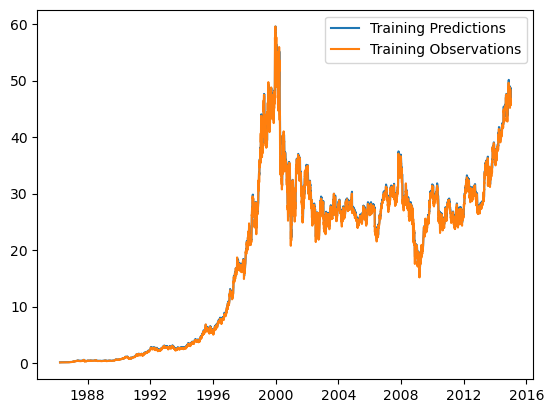

In [40]:
train_predictions = multi_head.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

29/29 [==============================] - 0s 1ms/step


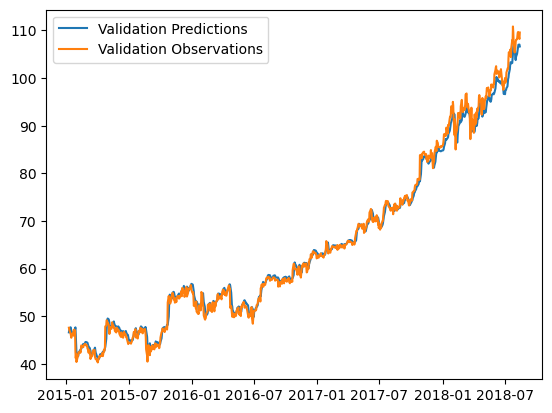

In [41]:
val_predictions = multi_head.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

29/29 [==============================] - 0s 1ms/step


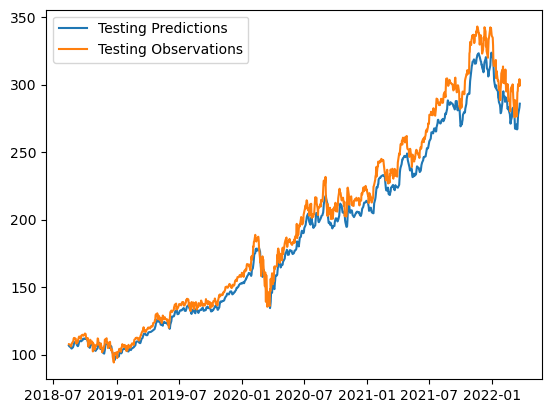

In [42]:
test_predictions = multi_head.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [43]:
y_pred_test = multi_head.predict(X_test)
mse_test=mean_squared_error(y_test, y_pred_test)
print('mse_test:',mse_test)

29/29 [==============================] - 0s 1ms/step
mse_test: 113.44589


In [44]:
y_pred_test = multi_head.predict(X_test)
mse_val=mean_squared_error(y_test, y_pred_test)
print('mse_test:',mse_test)

29/29 [==============================] - 0s 1ms/step
mse_test: 113.44589
